# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [29]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [26]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

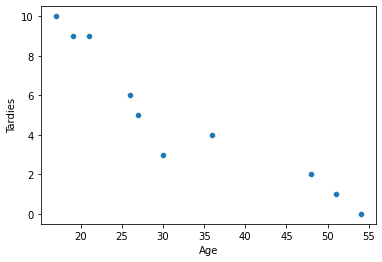

In [27]:
sns.scatterplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Yes, it is clear, the younger the student the higher the tardiness to class 
# i.e. a 54years old is late less than a minute whereas the one under 20 is late 10 minutes
# So the relationship between the variables is here

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [39]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [40]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# Covariance is a measure of how much two random variables vary together while correlation measures 
# both the strength and direction of the linear relationship between two variables. 
# Correlation is a function of the covariance. ... This is precisely the range of the correlation values

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [32]:
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 
#intercept is our B0 or A0 that show the value of y when x=0
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [ ]:
# What will be your outcome variable? the intercept (constant) is when the value at which the regression 
# line crosses the y-axis (here 12.88)
# What type of regression are you using? 
# Its a simple linear regression when the independent variable X "Age" is used to predict the outcome 
# of variable Y "The tardies"

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

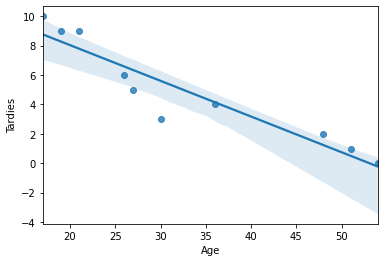

In [37]:
sns.regplot(x="Age", y="Tardies", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# In fact, age is a good predictor of tardiness for this dataset but of course we need to interpret this 
# topic on a bigger scale than 10 values. Going back to our dataset, there is a high negative correlation 
# between Age and Tardiness meaning the younger the individual is the higher the tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [41]:
import seaborn as sns
import pandas as pd
from scipy import stats

Vehicles = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 6/Day 26/vehicles.csv')
Vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
Vehicles_data = Vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']] 
Vehicles_data.corr()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
# Fuel Barrels/Year and Fuel Cost/Year then Cylinders variables are the most important in determining CO2 emissions. 
# Combined MPG has an strong negative correlation to CO2 Emission.
# Year provides the least amount of helpful information for determining CO2 emissions

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [45]:
import statsmodels.api as sm

X = sm.add_constant(Vehicles_data[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
Y = Vehicles_data['CO2 Emission Grams/Mile']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 4.470e+05
Date:                     Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                             00:09:50   Log-Likelihood:            -1.5226e+05
No. Observations:                    35952   AIC:                         3.045e+05
Df Residuals:                        35947   BIC:                         3.046e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
# this model is a multiple regression model) with a high R-squared and a very low F-statistic 


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# there is a strong linear regression. The most important variables are Fuel Barrels/ Year and Cylinders. 
# the R-squared and adj R-squared are same

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [46]:
Parties_data = pd.DataFrame({'people_invited':[1,3,4,6,8,9,11,14], 'people_attended':[1,2,4,4,5,7,8,13]})
Parties_data


,people_invited,people_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='people_invited', ylabel='people_attended'>

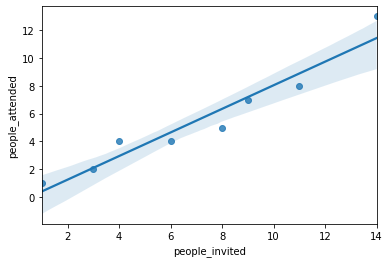

In [47]:
sns.regplot(x="people_invited", y="people_attended", data=Parties_data)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
A linear regression exists between the variables

In [49]:
from scipy import stats

X = Parties_data['people_invited']
Y = Parties_data['people_attended']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 
#intercept is our B0 or A0 that show the value of y when x=0
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [56]:
# The last value is an outlier in the dataset 

In [54]:
# We can remove the outlier 
Parties_data.drop([7], axis=0, inplace=True)
# it is giving the below error because I ran twice and raw 7 is already deleted

KeyError: '[7] not found in axis'

<AxesSubplot:xlabel='people_invited', ylabel='people_attended'>

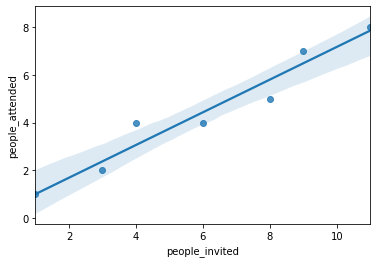

In [58]:
sns.regplot(x="people_invited", y="people_attended", data=Parties_data)

In [59]:
X = Parties_data['people_invited']
Y = Parties_data['people_attended']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) 
#intercept is our B0 or A0 that show the value of y when x=0
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.6842105263157895
The intercept is: 0.32330827067669166


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
The linear regression seems to be pretty much aligned around the line (values close to the line)